In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
import itertools

import numpy as np
import seaborn as sns
import pandas as pd

from paderbox.visualization import plot, context_manager
from padercontrib.database.keys import *
from padercontrib.database.iterator import AudioReader
from paderbox.transform import stft, istft
from paderbox.array import interval
from padercontrib.visualization.database_to_html import display_database_html

from padercontrib.database.fearless import Fearless

In [3]:
db = Fearless()
db

Fearless(PosixPath('/net/vol/jenkins/jsons/fearless.json'))

In [4]:
db.dataset_names

('Dev_SID',
 'Dev_segment',
 'Dev_stream',
 'Eval_SID',
 'Eval_segment',
 'Eval_stream',
 'Train_SID',
 'Train_segment',
 'Train_stream')

## Streams

In [5]:
datasets = [
 'Dev_stream',
 'Eval_stream',
 'Train_stream',
]
datasets

['Dev_stream', 'Eval_stream', 'Train_stream']

### Dev Stream

In [6]:
dataset_Dev_str = db.get_dataset('Dev_stream')
df_dev_str = pd.DataFrame(dataset_Dev_str)
#df_dev_str = df_dev_str.drop(columns=['audio_path', 'example_id'])
df_dev_str.head()

,audio_path,end,num_samples,num_speakers,speaker_id,start,transcription,example_id,dataset
0,{'observation': '/net/db/fearless/Audio/Stream...,"[1716960, 1724240, 1738480, 1742720, 1967600, ...",14816000,8,"[PROCEDURES1, FD1, PROCEDURES1, FD1, CONTROL1,...","[1710480, 1716960, 1724720, 1739440, 1955360, ...","[FLIGHT PROCEDURES., Go PROCEDURES., Upper clo...",FS02_dev_001,Dev_stream
1,{'observation': '/net/db/fearless/Audio/Stream...,"[24800, 128560, 143040, 164080, 172320, 206240...",14400000,30,"[EECOM3, TRACK0, MADRID, TRACK0, EECOM3, MADRI...","[16800, 123360, 140320, 148560, 164080, 176000...","[SPAN EECOM conference., MADRID TRACK., MADRID...",FS02_dev_002,Dev_stream
2,{'observation': '/net/db/fearless/Audio/Stream...,"[98400, 158960, 169680, 262480, 526720, 767200...",14400000,26,"[CAPCOM1, EMU, FD1, BUZZ, BUZZ, BUZZ, NEIL, BU...","[36320, 98400, 162720, 169680, 285840, 544480,...","[Uh roger BUZZ, and break break COLUMBIA this ...",FS02_dev_003,Dev_stream
3,{'observation': '/net/db/fearless/Audio/Stream...,"[748080, 760480, 770000, 802720, 826080, 88120...",14955294,11,"[RETRO1, FIDO1, RETRO1, UNK, FIDO1, RETRO1, FI...","[739600, 757520, 761920, 797040, 815840, 84056...","[FIDO this is RETRO., Go ahead., Did you get t...",FS02_dev_004,Dev_stream
4,{'observation': '/net/db/fearless/Audio/Stream...,"[28240, 102000, 146320, 182160, 258720, 376480...",14400000,14,"[CAPCOM1, BUZZ, CAPCOM1, BUZZ, CAPCOM1, BUZZ, ...","[0, 61920, 103840, 172560, 190080, 337840, 390...",[Is HOUSTON uh radio check and verify T.V. cir...,FS02_dev_005,Dev_stream


In [7]:
df_dev_str

,audio_path,end,num_samples,num_speakers,speaker_id,start,transcription,example_id,dataset
0,{'observation': '/net/db/fearless/Audio/Stream...,"[1716960, 1724240, 1738480, 1742720, 1967600, ...",14816000,8,"[PROCEDURES1, FD1, PROCEDURES1, FD1, CONTROL1,...","[1710480, 1716960, 1724720, 1739440, 1955360, ...","[FLIGHT PROCEDURES., Go PROCEDURES., Upper clo...",FS02_dev_001,Dev_stream
1,{'observation': '/net/db/fearless/Audio/Stream...,"[24800, 128560, 143040, 164080, 172320, 206240...",14400000,30,"[EECOM3, TRACK0, MADRID, TRACK0, EECOM3, MADRI...","[16800, 123360, 140320, 148560, 164080, 176000...","[SPAN EECOM conference., MADRID TRACK., MADRID...",FS02_dev_002,Dev_stream
2,{'observation': '/net/db/fearless/Audio/Stream...,"[98400, 158960, 169680, 262480, 526720, 767200...",14400000,26,"[CAPCOM1, EMU, FD1, BUZZ, BUZZ, BUZZ, NEIL, BU...","[36320, 98400, 162720, 169680, 285840, 544480,...","[Uh roger BUZZ, and break break COLUMBIA this ...",FS02_dev_003,Dev_stream
3,{'observation': '/net/db/fearless/Audio/Stream...,"[748080, 760480, 770000, 802720, 826080, 88120...",14955294,11,"[RETRO1, FIDO1, RETRO1, UNK, FIDO1, RETRO1, FI...","[739600, 757520, 761920, 797040, 815840, 84056...","[FIDO this is RETRO., Go ahead., Did you get t...",FS02_dev_004,Dev_stream
4,{'observation': '/net/db/fearless/Audio/Stream...,"[28240, 102000, 146320, 182160, 258720, 376480...",14400000,14,"[CAPCOM1, BUZZ, CAPCOM1, BUZZ, CAPCOM1, BUZZ, ...","[0, 61920, 103840, 172560, 190080, 337840, 390...",[Is HOUSTON uh radio check and verify T.V. cir...,FS02_dev_005,Dev_stream
5,{'observation': '/net/db/fearless/Audio/Stream...,"[741360, 745840, 765840, 782400, 787040, 83736...",14816000,11,"[CAPCOM2, GUIDANCE1, CAPCOM2, GUIDANCE1, CAPCO...","[724560, 742560, 749600, 768560, 782400, 79400...","[GUIDANCE [unk] CAPCOM MOCR DYN, Go ahead., He...",FS02_dev_006,Dev_stream
6,{'observation': '/net/db/fearless/Audio/Stream...,"[111120, 129280, 135280, 147280, 196320, 22008...",14400000,8,"[FIDO3, GUIDANCE4, FIDO3, BUZZ, CAPCOM2, GUIDA...","[108160, 111840, 132000, 135280, 152320, 20488...","[Copy., JAY we'll need that radar [unk] eighte...",FS02_dev_007,Dev_stream
7,{'observation': '/net/db/fearless/Audio/Stream...,"[222960, 247440, 277040, 399680, 444160, 60536...",14400000,25,"[NEIL, EMU, NEIL, CAPCOM1, NEIL, TELCOM2, FD1,...","[50000, 240720, 253920, 286640, 428080, 600880...",[Uh roger uh The weight of the R.C.U. Uh Was T...,FS02_dev_008,Dev_stream
8,{'observation': '/net/db/fearless/Audio/Stream...,"[23760, 32479, 54400, 102640, 154400, 182640, ...",14400000,59,"[NETWORK3, ALDS, NETWORK3, ALDS, NETWORK3, ALD...","[6000, 27280, 33520, 65600, 134240, 162880, 19...","[Roger. A.L.D.S. NETWORK, A.L.D.S., What is yo...",FS02_dev_009,Dev_stream
9,{'observation': '/net/db/fearless/Audio/Stream...,"[25440, 35760, 56400, 79520, 93120, 124160, 12...",14400000,41,"[CCATSCOMMAND, NETWORK5, CCATSCOMMAND, NETWORK...","[17200, 28560, 36960, 64080, 80480, 117920, 12...","[NETWORK CCATSCOMMAND., C. CATS COMMAND NETWOR...",FS02_dev_010,Dev_stream


### Train Stream

In [8]:
dataset_Train_str = db.get_dataset('Train_stream')
df_tr_str = pd.DataFrame(dataset_Train_str)
#df_tr_str = df_tr_str.drop(columns=['audio_path', 'example_id'])
df_tr_str.head()

,audio_path,end,num_samples,num_speakers,speaker_id,start,transcription,example_id,dataset
0,{'observation': '/net/db/fearless/Audio/Stream...,"[71040, 99920, 171120, 204320, 209840, 234160,...",14400000,45,"[HOUSTONCOMMTECH2, NETWORK3, HOUSTONCOMMTECH2,...","[0, 73280, 107680, 171120, 205280, 213600, 240...",[To it about three different Pass. He's gettin...,FS02_train_001,Train_stream
1,{'observation': '/net/db/fearless/Audio/Stream...,"[45760, 142560, 195120, 226240, 254080, 257279...",14400000,24,"[FD1, CAPCOM2, FD1, CAPCOM2, GUIDANCE4, FD1, G...","[19840, 61440, 143840, 200720, 248720, 254080,...",[Okay that must mean he's gone through the AGS...,FS02_train_002,Train_stream
2,{'observation': '/net/db/fearless/Audio/Stream...,"[8720, 25920, 35280, 41840, 43360, 51200, 6520...",14400000,20,"[FD1, CONTROL1, CAPCOM2, GUIDANCE4, FD1, CONTR...","[0, 23280, 27040, 35280, 41840, 44320, 51200, ...","[Improper switch position., Oh, He's trying to...",FS02_train_003,Train_stream
3,{'observation': '/net/db/fearless/Audio/Stream...,"[16800, 20800, 32640, 45760, 49680, 74960, 118...",14400000,47,"[MCCFILEspk1, CVTS, NETWORK3, FD1, RTC1, MCCFI...","[0, 16800, 20800, 38560, 47440, 49680, 74960, ...",[Thing to do is to just pull the recycle immed...,FS02_train_004,Train_stream
4,{'observation': '/net/db/fearless/Audio/Stream...,"[136880, 169840, 173600, 183520, 193280, 24624...",14816000,9,"[FD1, CONTROL1, FD1, CAPCOM2, CONTROL1, CONTRO...","[129360, 138560, 170640, 176800, 184400, 24000...","[Did you copy there CONTROL?, FLIGHT it's caus...",FS02_train_005,Train_stream


## Transformation

In [9]:
import paderbox as pb
import matplotlib.pyplot as plt
from paderbox.transform import mfcc

In [10]:
example = db.get_dataset('Train_stream')
activity = db.get_activity(example[0])

In [11]:
num_samp = 0
num_frame = 60

x_train_raw=[]
x_train = []
y_train = []
num_4sec_frames = num_frame
for i in range(num_4sec_frames):
    x_train_raw_audio = pb.io.load_audio(df_tr_str['audio_path'][num_samp]['observation'], 
                                         start = i*32000+1, frames=4*8000)
    activity = db.get_activity(example[num_samp])
    x_train.append(mfcc(x_train_raw_audio))
    x_train_raw.append(x_train_raw_audio)
    #pb.io.play(x_train_raw_audio, sample_rate=8000)
    x_train_stft = stft(x_train_raw_audio)
    print(np.mean(np.real(x_train_stft)))
    #plot.stft(x_train_stft)
    y_train.append(any(activity[i*1*8000:(i+1)*1*8000]) & 1)

7.558789169580125e-06
-1.3343632569775093e-06
-3.0942548785305215e-06
-6.271273072002874e-06
-1.9683614808912346e-06
2.30644181457931e-06
5.272647790742329e-06
1.2089690269780381e-05
-6.101842512164056e-06
-4.418467917637416e-06
-7.800052040501606e-06
-6.877943786263938e-06
-1.3140628212375355e-06
1.2529272782175264e-05
-1.4763101499680216e-05
-4.6003910533168035e-06
4.183451334635561e-06
7.638429340563573e-06
6.411033764220118e-06
-4.894747371562326e-06
1.3018044811940501e-05
-1.881694236001892e-07
1.0456285978618514e-05
-1.214122214512539e-05
2.214855617947012e-05
-2.000061392086961e-05
3.7220068145219617e-06
7.789901822630822e-06
9.70985457214006e-06
-9.202343678614126e-06
-6.64917349118194e-06
-3.903929950110652e-08
6.756921957808393e-06
-4.68003122430197e-06
1.062727811043712e-05
-1.994127418562459e-06
7.077044213724045e-06
-4.3763054741740366e-06
-5.987066971627832e-06
-1.026577419704881e-05
-7.226174337822301e-06
8.755734092310733e-06
-1.5147248206783174e-06
-9.399101748104165e-

In [12]:
np.real(np.mean(x_train_stft))

-6.820946408991307e-06

In [13]:
y_train

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

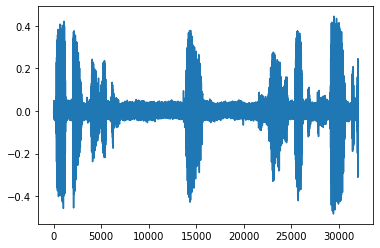

In [14]:
plt.plot(x_train_raw[0])

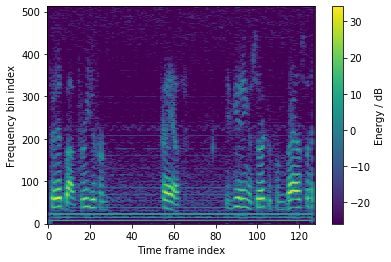

In [15]:
plot.stft(stft(x_train_raw[0]))

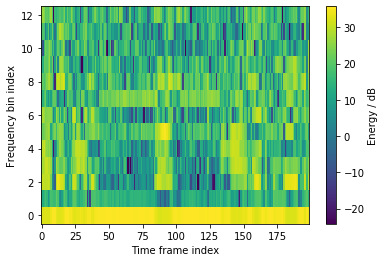

In [16]:
plot.stft(mfcc(x_train_raw[0]), colorbar=True, ax=None)

In [17]:
dataset = np.array(x_train)
label = np.array(y_train)

In [18]:
dataset.shape

(60, 199, 13)

In [19]:
label.shape

(60,)

In [20]:
print(dataset)

[[[-5.03843767e+01  4.89769656e+00 -2.14602779e+01 ... -9.39666699e+00
   -2.73628440e+00  2.10997975e+01]
  [-4.32637120e+01  4.42778252e+00 -3.23844659e+01 ... -3.65412467e-01
   -9.13456318e+00  2.10760592e+01]
  [-4.30802458e+01  5.95855469e+00 -3.15178369e+01 ... -6.21424680e+00
   -8.04201195e+00  1.69483874e+01]
  ...
  [-4.79041345e+01  8.20811874e+00 -3.20860814e+01 ... -2.96365318e+00
   -1.76371746e+01  1.83523440e+01]
  [-5.71115235e+01  1.02420379e+01 -6.63521482e+00 ...  1.84745148e+00
   -1.63225607e+00  1.93616429e+00]
  [-4.77312749e+01  5.16643799e+00 -2.69845321e+01 ... -2.28764577e+01
    2.55556185e+00  5.91902013e+00]]

 [[-4.41443686e+01  1.88090590e+00 -2.39475064e+01 ... -8.33980762e+00
    7.85726605e+00  8.75780522e+00]
  [-4.57389222e+01  2.09174396e+00 -1.56653876e+01 ...  7.12222179e-01
   -2.98751884e+00  7.95756927e+00]
  [-4.73615133e+01  2.94580787e+00 -8.87600401e+00 ...  8.23561426e+00
   -1.09032371e+00  5.48485823e+00]
  ...
  [-4.37307710e+01 -8.2

In [21]:
print(label)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
